### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


TARGET
- 0: 만족
- 1: 불만족

산탄데르의 평가는 area under the ROC curve로 할 것임.

submissions are evaluated on **area under the ROC curve** between the predicted probability and the observed target

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


원래 info를 하면 null 값이 나오는데 칼럼이 너무 많다보니까 안됐음. 

전부다 숫자형, 실수형이 111, 정수형이 260개.

In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


다 확인할 순 없지만 몇가지 살펴볼 때, 
var3을 보면 min 값이 -999999이다. null 값일 가능성이 높다. 그 밑을 보면 2가 가장 많은데 -999999라는건 그럴 수 있다.

그러므로 var3 를 10개만 추출해보자.

In [5]:
print(cust_df['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


-99999라는 숫자는 다른 숫자와 큰 차이가 나는 숫자이므로 가장 많은 숫자인 2로 replace를 해보자.

In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


학습: 만족이 96% 불만족이 4%
테스트: 만족이 96% 불만족이 4%

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
#위에 eval_set를 학습세트를 주고 테스트 세트를 넣었는데 원래 이렇게 검증하면 안된다. 여기선 1인 값이 4%밖에 안되기 때문에 그냥 이렇게 한 것일 뿐

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

#colsample_bytree는 column을 감소시켜서 전체가 아닌 일부만 하는 것
params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.716371	validation_1-auc:0.721224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.808233	validation_1-auc:0.811497
[2]	validation_0-auc:0.804883	validation_1-auc:0.804536
[3]	validation_0-auc:0.815261	validation_1-auc:0.81637
[4]	validation_0-auc:0.825247	validation_1-auc:0.824507
[5]	validation_0-auc:0.819668	validation_1-auc:0.820074
[6]	validation_0-auc:0.818989	validation_1-auc:0.819519
[7]	validation_0-auc:0.824907	validation_1-auc:0.825344
[8]	validation_0-auc:0.828985	validation_1-auc:0.828536
[9]	validation_0-auc:0.827021	validation_1-auc:0.825688
[10]	validation_0-auc:0.83165	validation_1-auc:0.828585
[11]	validation_0-auc:0.834058	validation_1-auc:0.831318
[12]	validation_0-auc:0.836334	validation_1-auc:0.832347
[13]	validation_0-auc:0.835441	validation_1-auc:0.831432
[14]	validation_0-auc:0.834861	validation_1-auc:0.830882


[47]	validation_0-auc:0.862967	validation_1-auc:0.842593
[48]	validation_0-auc:0.863551	validation_1-auc:0.84261
[49]	validation_0-auc:0.864042	validation_1-auc:0.842599
[50]	validation_0-auc:0.864366	validation_1-auc:0.842434
[51]	validation_0-auc:0.865353	validation_1-auc:0.843195
[52]	validation_0-auc:0.866013	validation_1-auc:0.843838
[53]	validation_0-auc:0.866414	validation_1-auc:0.84388
[54]	validation_0-auc:0.86717	validation_1-auc:0.844016
[55]	validation_0-auc:0.867641	validation_1-auc:0.8437
[56]	validation_0-auc:0.868209	validation_1-auc:0.844056
[57]	validation_0-auc:0.868522	validation_1-auc:0.844175
[58]	validation_0-auc:0.868781	validation_1-auc:0.844342
[59]	validation_0-auc:0.869079	validation_1-auc:0.844691
[60]	validation_0-auc:0.869423	validation_1-auc:0.844647
[61]	validation_0-auc:0.869812	validation_1-auc:0.844665
[62]	validation_0-auc:0.870011	validation_1-auc:0.844629
[63]	validation_0-auc:0.870417	validation_1-auc:0.844743
[64]	validation_0-auc:0.870882	valid

[1]	validation_0-auc:0.809291	validation_1-auc:0.810292
[2]	validation_0-auc:0.801509	validation_1-auc:0.805559
[3]	validation_0-auc:0.811599	validation_1-auc:0.814615
[4]	validation_0-auc:0.823122	validation_1-auc:0.824642
[5]	validation_0-auc:0.820774	validation_1-auc:0.820123
[6]	validation_0-auc:0.819431	validation_1-auc:0.819198
[7]	validation_0-auc:0.82599	validation_1-auc:0.825043
[8]	validation_0-auc:0.830975	validation_1-auc:0.829029
[9]	validation_0-auc:0.829664	validation_1-auc:0.827526
[10]	validation_0-auc:0.831341	validation_1-auc:0.829234
[11]	validation_0-auc:0.833655	validation_1-auc:0.83098
[12]	validation_0-auc:0.836167	validation_1-auc:0.832389
[13]	validation_0-auc:0.835919	validation_1-auc:0.830942
[14]	validation_0-auc:0.835294	validation_1-auc:0.831207
[15]	validation_0-auc:0.838006	validation_1-auc:0.832957
[16]	validation_0-auc:0.840265	validation_1-auc:0.834066
[17]	validation_0-auc:0.843274	validation_1-auc:0.837085
[18]	validation_0-auc:0.844687	validation_

[49]	validation_0-auc:0.865152	validation_1-auc:0.840495
[50]	validation_0-auc:0.865554	validation_1-auc:0.840383
[51]	validation_0-auc:0.866651	validation_1-auc:0.841277
[52]	validation_0-auc:0.867289	validation_1-auc:0.841679
[53]	validation_0-auc:0.86781	validation_1-auc:0.842134
[54]	validation_0-auc:0.868175	validation_1-auc:0.842503
[55]	validation_0-auc:0.868746	validation_1-auc:0.842126
[56]	validation_0-auc:0.869264	validation_1-auc:0.842363
[57]	validation_0-auc:0.869795	validation_1-auc:0.842344
[58]	validation_0-auc:0.870406	validation_1-auc:0.842145
[59]	validation_0-auc:0.870529	validation_1-auc:0.842306
[60]	validation_0-auc:0.870793	validation_1-auc:0.842345
[61]	validation_0-auc:0.871081	validation_1-auc:0.842398
[62]	validation_0-auc:0.871391	validation_1-auc:0.84243
[63]	validation_0-auc:0.871823	validation_1-auc:0.842369
[64]	validation_0-auc:0.872147	validation_1-auc:0.842177
[65]	validation_0-auc:0.872387	validation_1-auc:0.842151
[66]	validation_0-auc:0.872716	va

[91]	validation_0-auc:0.873633	validation_1-auc:0.841873
[92]	validation_0-auc:0.873647	validation_1-auc:0.841868
Stopping. Best iteration:
[62]	validation_0-auc:0.867211	validation_1-auc:0.842672

[0]	validation_0-auc:0.720599	validation_1-auc:0.727176
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813587	validation_1-auc:0.811508
[2]	validation_0-auc:0.809088	validation_1-auc:0.810017
[3]	validation_0-auc:0.816841	validation_1-auc:0.817096
[4]	validation_0-auc:0.825512	validation_1-auc:0.82418
[5]	validation_0-auc:0.819472	validation_1-auc:0.819553
[6]	validation_0-auc:0.818305	validation_1-auc:0.817745
[7]	validation_0-auc:0.824445	validation_1-auc:0.821165
[8]	validation_0-auc:0.829549	validation_1-auc:0.824451
[9]	validation_0-auc:0.827249	validation_1-auc:0.822791
[10]	validation_0-auc:0.831955	validation_1-auc:0.826125
[11]	validation_0-auc:0.83463

[44]	validation_0-auc:0.859675	validation_1-auc:0.843153
[45]	validation_0-auc:0.859877	validation_1-auc:0.842876
[46]	validation_0-auc:0.860834	validation_1-auc:0.843148
[47]	validation_0-auc:0.86139	validation_1-auc:0.84365
[48]	validation_0-auc:0.861896	validation_1-auc:0.843055
[49]	validation_0-auc:0.86227	validation_1-auc:0.843147
[50]	validation_0-auc:0.862465	validation_1-auc:0.843175
[51]	validation_0-auc:0.863455	validation_1-auc:0.843601
[52]	validation_0-auc:0.864045	validation_1-auc:0.844561
[53]	validation_0-auc:0.864373	validation_1-auc:0.844592
[54]	validation_0-auc:0.865132	validation_1-auc:0.844711
[55]	validation_0-auc:0.865639	validation_1-auc:0.844622
[56]	validation_0-auc:0.866214	validation_1-auc:0.844794
[57]	validation_0-auc:0.866654	validation_1-auc:0.845023
[58]	validation_0-auc:0.866913	validation_1-auc:0.844949
[59]	validation_0-auc:0.867022	validation_1-auc:0.845055
[60]	validation_0-auc:0.867324	validation_1-auc:0.845122
[61]	validation_0-auc:0.867565	val

[0]	validation_0-auc:0.735027	validation_1-auc:0.735335
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81492	validation_1-auc:0.813277
[2]	validation_0-auc:0.810019	validation_1-auc:0.807851
[3]	validation_0-auc:0.822639	validation_1-auc:0.822826
[4]	validation_0-auc:0.830942	validation_1-auc:0.828226
[5]	validation_0-auc:0.826201	validation_1-auc:0.824934
[6]	validation_0-auc:0.822353	validation_1-auc:0.822025
[7]	validation_0-auc:0.827969	validation_1-auc:0.826601
[8]	validation_0-auc:0.831812	validation_1-auc:0.829191
[9]	validation_0-auc:0.831194	validation_1-auc:0.830193
[10]	validation_0-auc:0.834307	validation_1-auc:0.830952
[11]	validation_0-auc:0.837904	validation_1-auc:0.833269
[12]	validation_0-auc:0.839525	validation_1-auc:0.833868
[13]	validation_0-auc:0.839272	validation_1-auc:0.833541
[14]	validation_0-auc:0.837883	validation_1-auc:0.832479

[44]	validation_0-auc:0.883866	validation_1-auc:0.838308
[45]	validation_0-auc:0.88396	validation_1-auc:0.837827
[46]	validation_0-auc:0.885263	validation_1-auc:0.838541
[47]	validation_0-auc:0.886254	validation_1-auc:0.839524
[48]	validation_0-auc:0.887196	validation_1-auc:0.839156
[49]	validation_0-auc:0.887871	validation_1-auc:0.839015
[50]	validation_0-auc:0.888027	validation_1-auc:0.838628
[51]	validation_0-auc:0.888877	validation_1-auc:0.838931
[52]	validation_0-auc:0.889471	validation_1-auc:0.839587
[53]	validation_0-auc:0.889866	validation_1-auc:0.839802
[54]	validation_0-auc:0.890597	validation_1-auc:0.839836
[55]	validation_0-auc:0.891061	validation_1-auc:0.83964
[56]	validation_0-auc:0.891719	validation_1-auc:0.840061
[57]	validation_0-auc:0.892214	validation_1-auc:0.840121
[58]	validation_0-auc:0.892491	validation_1-auc:0.839979
[59]	validation_0-auc:0.892534	validation_1-auc:0.839805
[60]	validation_0-auc:0.893058	validation_1-auc:0.840159
[61]	validation_0-auc:0.893279	va

[20]	validation_0-auc:0.861065	validation_1-auc:0.837455
[21]	validation_0-auc:0.861623	validation_1-auc:0.836928
[22]	validation_0-auc:0.860825	validation_1-auc:0.83631
[23]	validation_0-auc:0.862987	validation_1-auc:0.836815
[24]	validation_0-auc:0.863947	validation_1-auc:0.83794
[25]	validation_0-auc:0.863592	validation_1-auc:0.837839
[26]	validation_0-auc:0.864485	validation_1-auc:0.837299
[27]	validation_0-auc:0.866097	validation_1-auc:0.837962
[28]	validation_0-auc:0.868118	validation_1-auc:0.837987
[29]	validation_0-auc:0.868262	validation_1-auc:0.838402
[30]	validation_0-auc:0.869825	validation_1-auc:0.839272
[31]	validation_0-auc:0.871116	validation_1-auc:0.839298
[32]	validation_0-auc:0.871551	validation_1-auc:0.838975
[33]	validation_0-auc:0.872337	validation_1-auc:0.838641
[34]	validation_0-auc:0.873346	validation_1-auc:0.838029
[35]	validation_0-auc:0.876211	validation_1-auc:0.837885
[36]	validation_0-auc:0.878087	validation_1-auc:0.837843
[37]	validation_0-auc:0.87863	val

[74]	validation_0-auc:0.896502	validation_1-auc:0.843407
[75]	validation_0-auc:0.896762	validation_1-auc:0.843536
[76]	validation_0-auc:0.896822	validation_1-auc:0.843657
[77]	validation_0-auc:0.896957	validation_1-auc:0.843717
[78]	validation_0-auc:0.897215	validation_1-auc:0.843671
[79]	validation_0-auc:0.897411	validation_1-auc:0.84374
[80]	validation_0-auc:0.897455	validation_1-auc:0.84355
[81]	validation_0-auc:0.897449	validation_1-auc:0.843488
[82]	validation_0-auc:0.897494	validation_1-auc:0.843507
[83]	validation_0-auc:0.898414	validation_1-auc:0.844046
[84]	validation_0-auc:0.898664	validation_1-auc:0.843991
[85]	validation_0-auc:0.898771	validation_1-auc:0.844074
[86]	validation_0-auc:0.898867	validation_1-auc:0.844106
[87]	validation_0-auc:0.899498	validation_1-auc:0.844263
[88]	validation_0-auc:0.899696	validation_1-auc:0.844176
[89]	validation_0-auc:0.899781	validation_1-auc:0.844125
[90]	validation_0-auc:0.900419	validation_1-auc:0.844283
[91]	validation_0-auc:0.90043	val

[17]	validation_0-auc:0.85466	validation_1-auc:0.83771
[18]	validation_0-auc:0.855903	validation_1-auc:0.838248
[19]	validation_0-auc:0.855356	validation_1-auc:0.838063
[20]	validation_0-auc:0.857937	validation_1-auc:0.839188
[21]	validation_0-auc:0.858802	validation_1-auc:0.838105
[22]	validation_0-auc:0.858538	validation_1-auc:0.836951
[23]	validation_0-auc:0.860263	validation_1-auc:0.838669
[24]	validation_0-auc:0.86152	validation_1-auc:0.839808
[25]	validation_0-auc:0.861871	validation_1-auc:0.838553
[26]	validation_0-auc:0.862476	validation_1-auc:0.837949
[27]	validation_0-auc:0.864001	validation_1-auc:0.839431
[28]	validation_0-auc:0.865204	validation_1-auc:0.839756
[29]	validation_0-auc:0.865209	validation_1-auc:0.838697
[30]	validation_0-auc:0.86648	validation_1-auc:0.839908
[31]	validation_0-auc:0.867883	validation_1-auc:0.840735
[32]	validation_0-auc:0.868741	validation_1-auc:0.840484
[33]	validation_0-auc:0.869669	validation_1-auc:0.840787
[34]	validation_0-auc:0.869892	vali

[59]	validation_0-auc:0.885952	validation_1-auc:0.84472
[60]	validation_0-auc:0.886392	validation_1-auc:0.844757
[61]	validation_0-auc:0.886671	validation_1-auc:0.844602
[62]	validation_0-auc:0.886879	validation_1-auc:0.844753
[63]	validation_0-auc:0.887226	validation_1-auc:0.844586
[64]	validation_0-auc:0.887641	validation_1-auc:0.844526
[65]	validation_0-auc:0.887963	validation_1-auc:0.844478
[66]	validation_0-auc:0.888125	validation_1-auc:0.844307
[67]	validation_0-auc:0.88838	validation_1-auc:0.844354
[68]	validation_0-auc:0.888613	validation_1-auc:0.844493
[69]	validation_0-auc:0.888692	validation_1-auc:0.844463
[70]	validation_0-auc:0.888954	validation_1-auc:0.844633
[71]	validation_0-auc:0.889285	validation_1-auc:0.844523
[72]	validation_0-auc:0.889456	validation_1-auc:0.844447
[73]	validation_0-auc:0.889553	validation_1-auc:0.844276
[74]	validation_0-auc:0.889602	validation_1-auc:0.844382
[75]	validation_0-auc:0.889765	validation_1-auc:0.844364
[76]	validation_0-auc:0.889802	va

[17]	validation_0-auc:0.854478	validation_1-auc:0.836062
[18]	validation_0-auc:0.856799	validation_1-auc:0.838367
[19]	validation_0-auc:0.855686	validation_1-auc:0.837554
[20]	validation_0-auc:0.856948	validation_1-auc:0.837934
[21]	validation_0-auc:0.857847	validation_1-auc:0.837916
[22]	validation_0-auc:0.857669	validation_1-auc:0.837855
[23]	validation_0-auc:0.859283	validation_1-auc:0.838945
[24]	validation_0-auc:0.86041	validation_1-auc:0.839746
[25]	validation_0-auc:0.860838	validation_1-auc:0.839309
[26]	validation_0-auc:0.861041	validation_1-auc:0.838778
[27]	validation_0-auc:0.862158	validation_1-auc:0.839817
[28]	validation_0-auc:0.863805	validation_1-auc:0.840639
[29]	validation_0-auc:0.864097	validation_1-auc:0.840569
[30]	validation_0-auc:0.866199	validation_1-auc:0.841654
[31]	validation_0-auc:0.867624	validation_1-auc:0.842761
[32]	validation_0-auc:0.867772	validation_1-auc:0.841998
[33]	validation_0-auc:0.86771	validation_1-auc:0.842154
[34]	validation_0-auc:0.868043	va

[80]	validation_0-auc:0.893242	validation_1-auc:0.842128
[81]	validation_0-auc:0.893335	validation_1-auc:0.84216
[82]	validation_0-auc:0.893393	validation_1-auc:0.84219
[83]	validation_0-auc:0.893833	validation_1-auc:0.842336
[84]	validation_0-auc:0.894021	validation_1-auc:0.842299
[85]	validation_0-auc:0.89418	validation_1-auc:0.842333
[86]	validation_0-auc:0.894252	validation_1-auc:0.842303
[87]	validation_0-auc:0.894739	validation_1-auc:0.842302
[88]	validation_0-auc:0.894996	validation_1-auc:0.842276
[89]	validation_0-auc:0.895222	validation_1-auc:0.842239
[90]	validation_0-auc:0.895531	validation_1-auc:0.842325
[91]	validation_0-auc:0.896119	validation_1-auc:0.84252
[92]	validation_0-auc:0.896216	validation_1-auc:0.842463
[93]	validation_0-auc:0.896321	validation_1-auc:0.842536
[94]	validation_0-auc:0.896373	validation_1-auc:0.842526
[95]	validation_0-auc:0.896786	validation_1-auc:0.842292
[96]	validation_0-auc:0.897123	validation_1-auc:0.842485
[97]	validation_0-auc:0.89727	valid

[46]	validation_0-auc:0.8648	validation_1-auc:0.841669
[47]	validation_0-auc:0.865247	validation_1-auc:0.841793
[48]	validation_0-auc:0.865712	validation_1-auc:0.842127
[49]	validation_0-auc:0.86601	validation_1-auc:0.841942
[50]	validation_0-auc:0.866654	validation_1-auc:0.841979
[51]	validation_0-auc:0.867175	validation_1-auc:0.842368
[52]	validation_0-auc:0.867716	validation_1-auc:0.84232
[53]	validation_0-auc:0.86815	validation_1-auc:0.842158
[54]	validation_0-auc:0.868542	validation_1-auc:0.842209
[55]	validation_0-auc:0.868815	validation_1-auc:0.84224
[56]	validation_0-auc:0.869038	validation_1-auc:0.842059
[57]	validation_0-auc:0.869329	validation_1-auc:0.842016
[58]	validation_0-auc:0.869477	validation_1-auc:0.841913
[59]	validation_0-auc:0.869677	validation_1-auc:0.842133
[60]	validation_0-auc:0.869763	validation_1-auc:0.841683
[61]	validation_0-auc:0.870157	validation_1-auc:0.841694
[62]	validation_0-auc:0.87072	validation_1-auc:0.841797
[63]	validation_0-auc:0.871404	validat

[21]	validation_0-auc:0.848269	validation_1-auc:0.838609
[22]	validation_0-auc:0.84854	validation_1-auc:0.838861
[23]	validation_0-auc:0.849219	validation_1-auc:0.839214
[24]	validation_0-auc:0.849667	validation_1-auc:0.839421
[25]	validation_0-auc:0.851032	validation_1-auc:0.839631
[26]	validation_0-auc:0.851507	validation_1-auc:0.839443
[27]	validation_0-auc:0.85173	validation_1-auc:0.840068
[28]	validation_0-auc:0.852347	validation_1-auc:0.840321
[29]	validation_0-auc:0.852853	validation_1-auc:0.840549
[30]	validation_0-auc:0.853382	validation_1-auc:0.840983
[31]	validation_0-auc:0.85414	validation_1-auc:0.841168
[32]	validation_0-auc:0.854864	validation_1-auc:0.840985
[33]	validation_0-auc:0.856042	validation_1-auc:0.840964
[34]	validation_0-auc:0.856663	validation_1-auc:0.840887
[35]	validation_0-auc:0.857275	validation_1-auc:0.840755
[36]	validation_0-auc:0.857992	validation_1-auc:0.840891
[37]	validation_0-auc:0.858724	validation_1-auc:0.841442
[38]	validation_0-auc:0.859673	val

[67]	validation_0-auc:0.874094	validation_1-auc:0.841995
[68]	validation_0-auc:0.874293	validation_1-auc:0.842076
[69]	validation_0-auc:0.874574	validation_1-auc:0.842319
[70]	validation_0-auc:0.874776	validation_1-auc:0.842496
[71]	validation_0-auc:0.875001	validation_1-auc:0.842369
[72]	validation_0-auc:0.875482	validation_1-auc:0.842579
[73]	validation_0-auc:0.875802	validation_1-auc:0.842413
[74]	validation_0-auc:0.875986	validation_1-auc:0.842394
[75]	validation_0-auc:0.876425	validation_1-auc:0.842592
[76]	validation_0-auc:0.876479	validation_1-auc:0.842572
[77]	validation_0-auc:0.876697	validation_1-auc:0.842393
[78]	validation_0-auc:0.87704	validation_1-auc:0.842439
[79]	validation_0-auc:0.877125	validation_1-auc:0.842482
[80]	validation_0-auc:0.877379	validation_1-auc:0.842524
[81]	validation_0-auc:0.877719	validation_1-auc:0.842536
[82]	validation_0-auc:0.87812	validation_1-auc:0.842526
[83]	validation_0-auc:0.878209	validation_1-auc:0.842568
[84]	validation_0-auc:0.878395	va

[35]	validation_0-auc:0.85759	validation_1-auc:0.842726
[36]	validation_0-auc:0.858	validation_1-auc:0.842454
[37]	validation_0-auc:0.858333	validation_1-auc:0.841799
[38]	validation_0-auc:0.858777	validation_1-auc:0.841887
[39]	validation_0-auc:0.85928	validation_1-auc:0.84174
[40]	validation_0-auc:0.859781	validation_1-auc:0.841652
[41]	validation_0-auc:0.860396	validation_1-auc:0.842248
[42]	validation_0-auc:0.860868	validation_1-auc:0.842219
[43]	validation_0-auc:0.861316	validation_1-auc:0.842178
[44]	validation_0-auc:0.86181	validation_1-auc:0.842234
[45]	validation_0-auc:0.86229	validation_1-auc:0.842692
[46]	validation_0-auc:0.862674	validation_1-auc:0.84277
[47]	validation_0-auc:0.862953	validation_1-auc:0.842554
[48]	validation_0-auc:0.863416	validation_1-auc:0.842482
[49]	validation_0-auc:0.863877	validation_1-auc:0.842551
[50]	validation_0-auc:0.864252	validation_1-auc:0.842979
[51]	validation_0-auc:0.86471	validation_1-auc:0.842786
[52]	validation_0-auc:0.865109	validation

[9]	validation_0-auc:0.838139	validation_1-auc:0.830813
[10]	validation_0-auc:0.838411	validation_1-auc:0.830358
[11]	validation_0-auc:0.839455	validation_1-auc:0.831975
[12]	validation_0-auc:0.840107	validation_1-auc:0.832663
[13]	validation_0-auc:0.841676	validation_1-auc:0.833822
[14]	validation_0-auc:0.842589	validation_1-auc:0.834433
[15]	validation_0-auc:0.843414	validation_1-auc:0.834282
[16]	validation_0-auc:0.84456	validation_1-auc:0.834773
[17]	validation_0-auc:0.845351	validation_1-auc:0.834892
[18]	validation_0-auc:0.845892	validation_1-auc:0.835711
[19]	validation_0-auc:0.845996	validation_1-auc:0.837348
[20]	validation_0-auc:0.847836	validation_1-auc:0.837871
[21]	validation_0-auc:0.847642	validation_1-auc:0.838138
[22]	validation_0-auc:0.84825	validation_1-auc:0.838559
[23]	validation_0-auc:0.848683	validation_1-auc:0.838986
[24]	validation_0-auc:0.848893	validation_1-auc:0.838704
[25]	validation_0-auc:0.850001	validation_1-auc:0.839012
[26]	validation_0-auc:0.850519	val

[72]	validation_0-auc:0.872146	validation_1-auc:0.843327
[73]	validation_0-auc:0.87233	validation_1-auc:0.843429
[74]	validation_0-auc:0.872579	validation_1-auc:0.84338
[75]	validation_0-auc:0.872866	validation_1-auc:0.843064
[76]	validation_0-auc:0.872944	validation_1-auc:0.843145
[77]	validation_0-auc:0.873056	validation_1-auc:0.843229
[78]	validation_0-auc:0.87328	validation_1-auc:0.843186
[79]	validation_0-auc:0.873387	validation_1-auc:0.843194
[80]	validation_0-auc:0.87354	validation_1-auc:0.842953
[81]	validation_0-auc:0.873669	validation_1-auc:0.842926
[82]	validation_0-auc:0.873865	validation_1-auc:0.842949
[83]	validation_0-auc:0.873971	validation_1-auc:0.842868
[84]	validation_0-auc:0.874092	validation_1-auc:0.842976
[85]	validation_0-auc:0.874239	validation_1-auc:0.84318
[86]	validation_0-auc:0.874292	validation_1-auc:0.843079
[87]	validation_0-auc:0.874648	validation_1-auc:0.843095
[88]	validation_0-auc:0.874955	validation_1-auc:0.842935
[89]	validation_0-auc:0.875037	valid

[38]	validation_0-auc:0.881984	validation_1-auc:0.842147
[39]	validation_0-auc:0.882994	validation_1-auc:0.841905
[40]	validation_0-auc:0.88375	validation_1-auc:0.842009
[41]	validation_0-auc:0.884477	validation_1-auc:0.842543
[42]	validation_0-auc:0.885354	validation_1-auc:0.842277
[43]	validation_0-auc:0.886504	validation_1-auc:0.841963
[44]	validation_0-auc:0.887218	validation_1-auc:0.841897
[45]	validation_0-auc:0.888024	validation_1-auc:0.842132
[46]	validation_0-auc:0.88871	validation_1-auc:0.842191
[47]	validation_0-auc:0.889249	validation_1-auc:0.841935
[48]	validation_0-auc:0.889782	validation_1-auc:0.841548
[49]	validation_0-auc:0.890499	validation_1-auc:0.841694
[50]	validation_0-auc:0.891322	validation_1-auc:0.841738
[51]	validation_0-auc:0.891809	validation_1-auc:0.841493
[52]	validation_0-auc:0.89246	validation_1-auc:0.84135
[53]	validation_0-auc:0.892825	validation_1-auc:0.841669
[54]	validation_0-auc:0.89329	validation_1-auc:0.841769
[55]	validation_0-auc:0.893402	valid

[57]	validation_0-auc:0.893694	validation_1-auc:0.843455
[58]	validation_0-auc:0.894555	validation_1-auc:0.843582
[59]	validation_0-auc:0.894706	validation_1-auc:0.843591
[60]	validation_0-auc:0.894899	validation_1-auc:0.843354
[61]	validation_0-auc:0.895218	validation_1-auc:0.84345
Stopping. Best iteration:
[31]	validation_0-auc:0.875223	validation_1-auc:0.84504

[0]	validation_0-auc:0.824247	validation_1-auc:0.817042
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828268	validation_1-auc:0.820775
[2]	validation_0-auc:0.83099	validation_1-auc:0.821871
[3]	validation_0-auc:0.835811	validation_1-auc:0.824768
[4]	validation_0-auc:0.836693	validation_1-auc:0.829421
[5]	validation_0-auc:0.843953	validation_1-auc:0.831358
[6]	validation_0-auc:0.844795	validation_1-auc:0.831664
[7]	validation_0-auc:0.846039	validation_1-auc:0.831437
[8]	validation_0-auc:0.84671	

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822797	validation_1-auc:0.817858
[2]	validation_0-auc:0.830112	validation_1-auc:0.822657
[3]	validation_0-auc:0.836008	validation_1-auc:0.82756
[4]	validation_0-auc:0.837619	validation_1-auc:0.828466
[5]	validation_0-auc:0.839996	validation_1-auc:0.82965
[6]	validation_0-auc:0.842981	validation_1-auc:0.830086
[7]	validation_0-auc:0.84369	validation_1-auc:0.831006
[8]	validation_0-auc:0.845052	validation_1-auc:0.831272
[9]	validation_0-auc:0.847985	validation_1-auc:0.834577
[10]	validation_0-auc:0.849627	validation_1-auc:0.834416
[11]	validation_0-auc:0.849852	validation_1-auc:0.834503
[12]	validation_0-auc:0.850294	validation_1-auc:0.834119
[13]	validation_0-auc:0.852049	validation_1-auc:0.836065
[14]	validation_0-auc:0.853922	validation_1-auc:0.836222
[15]	validation_0-auc:0.855645	validation_1-auc:0.837817
[16]	validation_0-auc:0.857736	validation_1-auc:0.838048
[17]	validation_0-auc:0.859355	valid

[9]	validation_0-auc:0.846892	validation_1-auc:0.831069
[10]	validation_0-auc:0.848336	validation_1-auc:0.832402
[11]	validation_0-auc:0.85054	validation_1-auc:0.834388
[12]	validation_0-auc:0.851094	validation_1-auc:0.83519
[13]	validation_0-auc:0.853134	validation_1-auc:0.837028
[14]	validation_0-auc:0.854288	validation_1-auc:0.837004
[15]	validation_0-auc:0.855254	validation_1-auc:0.838322
[16]	validation_0-auc:0.856437	validation_1-auc:0.838067
[17]	validation_0-auc:0.857929	validation_1-auc:0.838312
[18]	validation_0-auc:0.859632	validation_1-auc:0.838508
[19]	validation_0-auc:0.860563	validation_1-auc:0.839477
[20]	validation_0-auc:0.862077	validation_1-auc:0.840735
[21]	validation_0-auc:0.862593	validation_1-auc:0.841008
[22]	validation_0-auc:0.86327	validation_1-auc:0.84181
[23]	validation_0-auc:0.864434	validation_1-auc:0.842597
[24]	validation_0-auc:0.865038	validation_1-auc:0.842642
[25]	validation_0-auc:0.86574	validation_1-auc:0.843322
[26]	validation_0-auc:0.86633	validat

[21]	validation_0-auc:0.865776	validation_1-auc:0.838794
[22]	validation_0-auc:0.86524	validation_1-auc:0.838435
[23]	validation_0-auc:0.867317	validation_1-auc:0.839363
[24]	validation_0-auc:0.868569	validation_1-auc:0.840288
[25]	validation_0-auc:0.869447	validation_1-auc:0.840665
[26]	validation_0-auc:0.86984	validation_1-auc:0.84061
[27]	validation_0-auc:0.872001	validation_1-auc:0.84066
[28]	validation_0-auc:0.873911	validation_1-auc:0.840676
[29]	validation_0-auc:0.874193	validation_1-auc:0.841444
[30]	validation_0-auc:0.875648	validation_1-auc:0.842116
[31]	validation_0-auc:0.87691	validation_1-auc:0.842438
[32]	validation_0-auc:0.877819	validation_1-auc:0.841824
[33]	validation_0-auc:0.878313	validation_1-auc:0.841681
[34]	validation_0-auc:0.878535	validation_1-auc:0.841624
[35]	validation_0-auc:0.881047	validation_1-auc:0.842103
[36]	validation_0-auc:0.883147	validation_1-auc:0.842436
[37]	validation_0-auc:0.883825	validation_1-auc:0.842027
[38]	validation_0-auc:0.884627	valid

위의 결과를 보고 난 뒤에.  
하이퍼 파라미터 튜닝을 한다고 해도 엄청 좋아지진 않는다.  
차라리 하이퍼 파라미터 튜닝보다는 피쳐 엔지니어링을 하는게 더 나은 경우가 많다.

In [10]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.817284	validation_1-auc:0.811534
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.820302	validation_1-auc:0.812178
[2]	validation_0-auc:0.823363	validation_1-auc:0.816027
[3]	validation_0-auc:0.825007	validation_1-auc:0.81705
[4]	validation_0-auc:0.825243	validation_1-auc:0.817264
[5]	validation_0-auc:0.827563	validation_1-auc:0.819988
[6]	validation_0-auc:0.827812	validation_1-auc:0.819542
[7]	validation_0-auc:0.827855	validation_1-auc:0.819216
[8]	validation_0-auc:0.829221	validation_1-auc:0.819799
[9]	validation_0-auc:0.829078	validation_1-auc:0.818898
[10]	validation_0-auc:0.830731	validation_1-auc:0.820967
[11]	validation_0-auc:0.828293	validation_1-auc:0.819437
[12]	validation_0-auc:0.829608	validation_1-auc:0.821204
[13]	validation_0-auc:0.830487	validation_1-auc:0.821121
[14]	validation_0-auc:0.834894	validation_1-auc:0.82706

[141]	validation_0-auc:0.85609	validation_1-auc:0.840527
[142]	validation_0-auc:0.856058	validation_1-auc:0.840824
[143]	validation_0-auc:0.856179	validation_1-auc:0.840714
[144]	validation_0-auc:0.856461	validation_1-auc:0.840902
[145]	validation_0-auc:0.856596	validation_1-auc:0.840922
[146]	validation_0-auc:0.85682	validation_1-auc:0.840999
[147]	validation_0-auc:0.856856	validation_1-auc:0.841113
[148]	validation_0-auc:0.856846	validation_1-auc:0.84122
[149]	validation_0-auc:0.856846	validation_1-auc:0.841151
[150]	validation_0-auc:0.856784	validation_1-auc:0.841142
[151]	validation_0-auc:0.856753	validation_1-auc:0.841307
[152]	validation_0-auc:0.856646	validation_1-auc:0.841443
[153]	validation_0-auc:0.856637	validation_1-auc:0.841588
[154]	validation_0-auc:0.856957	validation_1-auc:0.841629
[155]	validation_0-auc:0.857008	validation_1-auc:0.841672
[156]	validation_0-auc:0.857301	validation_1-auc:0.841631
[157]	validation_0-auc:0.857543	validation_1-auc:0.841666
[158]	validation_

[283]	validation_0-auc:0.872776	validation_1-auc:0.843025
[284]	validation_0-auc:0.872829	validation_1-auc:0.843029
[285]	validation_0-auc:0.872917	validation_1-auc:0.842988
[286]	validation_0-auc:0.87303	validation_1-auc:0.842969
[287]	validation_0-auc:0.873159	validation_1-auc:0.842969
[288]	validation_0-auc:0.873233	validation_1-auc:0.843004
[289]	validation_0-auc:0.873346	validation_1-auc:0.843044
[290]	validation_0-auc:0.87339	validation_1-auc:0.843025
[291]	validation_0-auc:0.873534	validation_1-auc:0.843058
[292]	validation_0-auc:0.873577	validation_1-auc:0.843123
[293]	validation_0-auc:0.87364	validation_1-auc:0.843134
[294]	validation_0-auc:0.873695	validation_1-auc:0.843111
[295]	validation_0-auc:0.873769	validation_1-auc:0.843094
[296]	validation_0-auc:0.873849	validation_1-auc:0.843137
[297]	validation_0-auc:0.873987	validation_1-auc:0.843165
[298]	validation_0-auc:0.874085	validation_1-auc:0.843203
[299]	validation_0-auc:0.874167	validation_1-auc:0.843232
[300]	validation_

책에서는 max_depth가 5일 때 최적이어서 넣었는데 그렇게 증가가 안되서 아래에 7로 다시 한번 함

In [11]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

피쳐중요도를 보자.  
Y축에 컬럼명이 나오고 x축에 f1 score로 feature importance가 나온다.  
Y축에 컬럼명이 나오는 이유는 이 학습을 넘파이가 아니라 판다스 데이터프레임으로 했기 때문임.

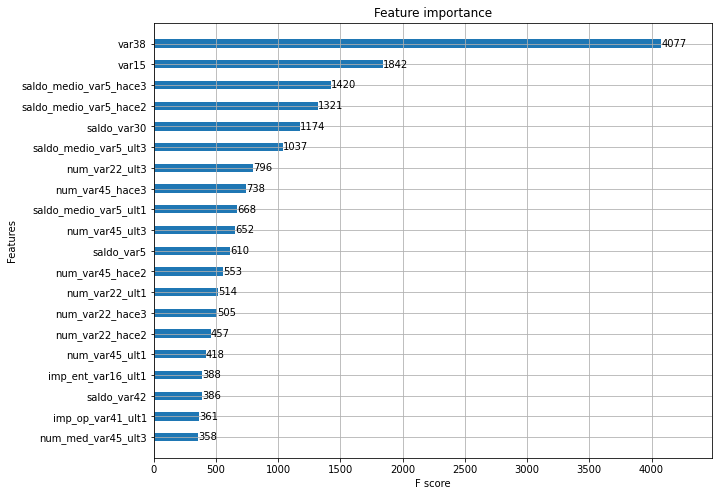

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

비슷한 작업을 이걸로 해보자.

In [13]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [14]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[38]	valid_0's auc: 0.883018	valid_0's binary_logloss: 0.121618	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.139968
[39]	valid_0's auc: 0.883857	valid_0's binary_logloss: 0.12136	valid_1's auc: 0.837075	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.884437	valid_0's binary_logloss: 0.121112	valid_1's auc: 0.836834	valid_1's binary_logloss: 0.139996
Early stopping, best iteration is:
[10]	valid_0's auc: 0.85489	valid_0's binary_logloss: 0.134153	valid_1's auc: 0.839913	valid_1's binary_logloss: 0.144571
[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logl

[41]	valid_0's auc: 0.884595	valid_0's binary_logloss: 0.120862	valid_1's auc: 0.838672	valid_1's binary_logloss: 0.139551
[42]	valid_0's auc: 0.885101	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.839085	valid_1's binary_logloss: 0.139462
[43]	valid_0's auc: 0.885377	valid_0's binary_logloss: 0.120471	valid_1's auc: 0.838989	valid_1's binary_logloss: 0.13949
Early stopping, best iteration is:
[13]	valid_0's auc: 0.85773	valid_0's binary_logloss: 0.131445	valid_1's auc: 0.840016	valid_1's binary_logloss: 0.142644
[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_loglo

[40]	valid_0's auc: 0.884325	valid_0's binary_logloss: 0.121031	valid_1's auc: 0.83612	valid_1's binary_logloss: 0.139622
[41]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.12081	valid_1's auc: 0.835963	valid_1's binary_logloss: 0.139644
[42]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139624
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856101	valid_0's binary_logloss: 0.13225	valid_1's auc: 0.840855	valid_1's binary_logloss: 0.142715
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logl

[39]	valid_0's auc: 0.883934	valid_0's binary_logloss: 0.12102	valid_1's auc: 0.838763	valid_1's binary_logloss: 0.139293
[40]	valid_0's auc: 0.884499	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.838547	valid_1's binary_logloss: 0.13931
Early stopping, best iteration is:
[10]	valid_0's auc: 0.854171	valid_0's binary_logloss: 0.133973	valid_1's auc: 0.8397	valid_1's binary_logloss: 0.144311
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_loglos

[37]	valid_0's auc: 0.884407	valid_0's binary_logloss: 0.121308	valid_1's auc: 0.840641	valid_1's binary_logloss: 0.139325
[38]	valid_0's auc: 0.885324	valid_0's binary_logloss: 0.121016	valid_1's auc: 0.840498	valid_1's binary_logloss: 0.13934
[39]	valid_0's auc: 0.885824	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.139346
[40]	valid_0's auc: 0.886492	valid_0's binary_logloss: 0.120515	valid_1's auc: 0.84003	valid_1's binary_logloss: 0.139395
[41]	valid_0's auc: 0.887212	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139397
[42]	valid_0's auc: 0.887679	valid_0's binary_logloss: 0.120004	valid_1's auc: 0.839795	valid_1's binary_logloss: 0.139391
[43]	valid_0's auc: 0.88855	valid_0's binary_logloss: 0.119787	valid_1's auc: 0.839567	valid_1's binary_logloss: 0.139426
[44]	valid_0's auc: 0.888918	valid_0's binary_logloss: 0.119598	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.139427
[45]	valid_0's auc:

[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	val

[28]	valid_0's auc: 0.896304	valid_0's binary_logloss: 0.117168	valid_1's auc: 0.837127	valid_1's binary_logloss: 0.139491
[29]	valid_0's auc: 0.89754	valid_0's binary_logloss: 0.116665	valid_1's auc: 0.837063	valid_1's binary_logloss: 0.139497
[30]	valid_0's auc: 0.898907	valid_0's binary_logloss: 0.116238	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.139457
[31]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.115802	valid_1's auc: 0.837327	valid_1's binary_logloss: 0.139384
[32]	valid_0's auc: 0.900529	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.139496
[33]	valid_0's auc: 0.90188	valid_0's binary_logloss: 0.114972	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.139413
[34]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.114528	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.13943
[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 

[28]	valid_0's auc: 0.896969	valid_0's binary_logloss: 0.11709	valid_1's auc: 0.840437	valid_1's binary_logloss: 0.139222
[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.

Early stopping, best iteration is:
[16]	valid_0's auc: 0.879918	valid_0's binary_logloss: 0.124701	valid_1's auc: 0.837709	valid_1's binary_logloss: 0.141283
[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss

[28]	valid_0's auc: 0.896304	valid_0's binary_logloss: 0.117168	valid_1's auc: 0.837127	valid_1's binary_logloss: 0.139491
[29]	valid_0's auc: 0.89754	valid_0's binary_logloss: 0.116665	valid_1's auc: 0.837063	valid_1's binary_logloss: 0.139497
[30]	valid_0's auc: 0.898907	valid_0's binary_logloss: 0.116238	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.139457
[31]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.115802	valid_1's auc: 0.837327	valid_1's binary_logloss: 0.139384
[32]	valid_0's auc: 0.900529	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.139496
[33]	valid_0's auc: 0.90188	valid_0's binary_logloss: 0.114972	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.139413
[34]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.114528	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.13943
[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 

[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.905129	valid_0's binary_logloss: 0.113587	valid_1's auc: 0.840769	valid_1's binary_logloss: 0.139037
[37]	valid_0's auc: 0.906133	valid_0's binary_logloss: 0.113131	valid_1's auc: 0.84035	valid_1's binary_logloss: 0.139137
[38]	valid_0's auc: 0.907	valid_0's binary_logloss: 0.112813	valid_1's auc: 0.840254	valid_1's binary_logloss: 0.139186
[39]	valid_0's auc: 0.90

[40]	valid_0's auc: 0.883347	valid_0's binary_logloss: 0.121692	valid_1's auc: 0.836542	valid_1's binary_logloss: 0.139995
Early stopping, best iteration is:
[10]	valid_0's auc: 0.854219	valid_0's binary_logloss: 0.134393	valid_1's auc: 0.840095	valid_1's binary_logloss: 0.144508
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logl

[38]	valid_0's auc: 0.879297	valid_0's binary_logloss: 0.122522	valid_1's auc: 0.840156	valid_1's binary_logloss: 0.139034
[39]	valid_0's auc: 0.880019	valid_0's binary_logloss: 0.122297	valid_1's auc: 0.840237	valid_1's binary_logloss: 0.138997
[40]	valid_0's auc: 0.88064	valid_0's binary_logloss: 0.122051	valid_1's auc: 0.840237	valid_1's binary_logloss: 0.139001
[41]	valid_0's auc: 0.88151	valid_0's binary_logloss: 0.121784	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.13906
[42]	valid_0's auc: 0.882288	valid_0's binary_logloss: 0.121573	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139089
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856046	valid_0's binary_logloss: 0.132732	valid_1's auc: 0.840999	valid_1's binary_logloss: 0.142898
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_log

[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_log

[38]	valid_0's auc: 0.882135	valid_0's binary_logloss: 0.122135	valid_1's auc: 0.836167	valid_1's binary_logloss: 0.14006
[39]	valid_0's auc: 0.882826	valid_0's binary_logloss: 0.121918	valid_1's auc: 0.836302	valid_1's binary_logloss: 0.140015
[40]	valid_0's auc: 0.883347	valid_0's binary_logloss: 0.121692	valid_1's auc: 0.836542	valid_1's binary_logloss: 0.139995
Early stopping, best iteration is:
[10]	valid_0's auc: 0.854219	valid_0's binary_logloss: 0.134393	valid_1's auc: 0.840095	valid_1's binary_logloss: 0.144508
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_log

[39]	valid_0's auc: 0.880019	valid_0's binary_logloss: 0.122297	valid_1's auc: 0.840237	valid_1's binary_logloss: 0.138997
[40]	valid_0's auc: 0.88064	valid_0's binary_logloss: 0.122051	valid_1's auc: 0.840237	valid_1's binary_logloss: 0.139001
[41]	valid_0's auc: 0.88151	valid_0's binary_logloss: 0.121784	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.13906
[42]	valid_0's auc: 0.882288	valid_0's binary_logloss: 0.121573	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139089
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856046	valid_0's binary_logloss: 0.132732	valid_1's auc: 0.840999	valid_1's binary_logloss: 0.142898
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logl

[70]	valid_0's auc: 0.898585	valid_0's binary_logloss: 0.115794	valid_1's auc: 0.84311	valid_1's binary_logloss: 0.138551
[71]	valid_0's auc: 0.898878	valid_0's binary_logloss: 0.115634	valid_1's auc: 0.843163	valid_1's binary_logloss: 0.138557
[72]	valid_0's auc: 0.89933	valid_0's binary_logloss: 0.11544	valid_1's auc: 0.843123	valid_1's binary_logloss: 0.138587
[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.

[24]	valid_0's auc: 0.888628	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.140607
[25]	valid_0's auc: 0.889539	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.140572
[26]	valid_0's auc: 0.890707	valid_0's binary_logloss: 0.119835	valid_1's auc: 0.834353	valid_1's binary_logloss: 0.140508
[27]	valid_0's auc: 0.89189	valid_0's binary_logloss: 0.119344	valid_1's auc: 0.833736	valid_1's binary_logloss: 0.14057
[28]	valid_0's auc: 0.892973	valid_0's binary_logloss: 0.118875	valid_1's auc: 0.83339	valid_1's binary_logloss: 0.140614
[29]	valid_0's auc: 0.894538	valid_0's binary_logloss: 0.118402	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140617
[30]	valid_0's auc: 0.895805	valid_0's binary_logloss: 0.117902	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140733
[31]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.14067
[32]	valid_0's auc: 

[28]	valid_0's auc: 0.890567	valid_0's binary_logloss: 0.119695	valid_1's auc: 0.839325	valid_1's binary_logloss: 0.139379
[29]	valid_0's auc: 0.891561	valid_0's binary_logloss: 0.119229	valid_1's auc: 0.838494	valid_1's binary_logloss: 0.139484
[30]	valid_0's auc: 0.892335	valid_0's binary_logloss: 0.118804	valid_1's auc: 0.838442	valid_1's binary_logloss: 0.139471
[31]	valid_0's auc: 0.893386	valid_0's binary_logloss: 0.118372	valid_1's auc: 0.838123	valid_1's binary_logloss: 0.139487
[32]	valid_0's auc: 0.894414	valid_0's binary_logloss: 0.117941	valid_1's auc: 0.838093	valid_1's binary_logloss: 0.139521
[33]	valid_0's auc: 0.895465	valid_0's binary_logloss: 0.117514	valid_1's auc: 0.837947	valid_1's binary_logloss: 0.139537
[34]	valid_0's auc: 0.896166	valid_0's binary_logloss: 0.117168	valid_1's auc: 0.837807	valid_1's binary_logloss: 0.139577
[35]	valid_0's auc: 0.896684	valid_0's binary_logloss: 0.116863	valid_1's auc: 0.837668	valid_1's binary_logloss: 0.139588
[36]	valid_0's a

[54]	valid_0's auc: 0.912261	valid_0's binary_logloss: 0.109498	valid_1's auc: 0.838252	valid_1's binary_logloss: 0.139711
[55]	valid_0's auc: 0.912616	valid_0's binary_logloss: 0.109226	valid_1's auc: 0.837936	valid_1's binary_logloss: 0.13983
[56]	valid_0's auc: 0.913202	valid_0's binary_logloss: 0.108936	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.13983
[57]	valid_0's auc: 0.913592	valid_0's binary_logloss: 0.10867	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139818
[58]	valid_0's auc: 0.913818	valid_0's binary_logloss: 0.108421	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139971
[59]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.108194	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.139971
[60]	valid_0's auc: 0.91493	valid_0's binary_logloss: 0.107966	valid_1's auc: 0.837549	valid_1's binary_logloss: 0.140068
[61]	valid_0's auc: 0.915354	valid_0's binary_logloss: 0.107682	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140197
[62]	valid_0's auc: 0

[24]	valid_0's auc: 0.888628	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.140607
[25]	valid_0's auc: 0.889539	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.140572
[26]	valid_0's auc: 0.890707	valid_0's binary_logloss: 0.119835	valid_1's auc: 0.834353	valid_1's binary_logloss: 0.140508
[27]	valid_0's auc: 0.89189	valid_0's binary_logloss: 0.119344	valid_1's auc: 0.833736	valid_1's binary_logloss: 0.14057
[28]	valid_0's auc: 0.892973	valid_0's binary_logloss: 0.118875	valid_1's auc: 0.83339	valid_1's binary_logloss: 0.140614
[29]	valid_0's auc: 0.894538	valid_0's binary_logloss: 0.118402	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140617
[30]	valid_0's auc: 0.895805	valid_0's binary_logloss: 0.117902	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140733
[31]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.14067
[32]	valid_0's auc: 

[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.121544	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.13967
[25]	valid_0's auc: 0.887231	valid_0's binary_logloss: 0.12107	valid_1's auc: 0.839583	valid_1's binary_logloss: 0.139554
[26]	valid_0's auc: 0.888362	valid_0's binary_logloss: 0.120592	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139477
[27]	valid_0's auc: 0.889402	valid_0's binary_logloss: 0.12012	valid_1's auc: 0.839576	valid_1's binary_logloss: 0.139364
[28]	valid_0's auc: 0.890567	valid_0's binary_logloss: 0.119695	valid_1's auc: 0.839325	valid_1's binary_logloss: 0.139379
[29]	valid_0's auc: 0.891561	valid_0's binary_logloss: 0.119229	valid_1's auc: 0.838494	valid_1's binary_logloss: 0.139484
[30]	valid_0's auc:

[44]	valid_0's auc: 0.907269	valid_0's binary_logloss: 0.112432	valid_1's auc: 0.839357	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.907761	valid_0's binary_logloss: 0.112094	valid_1's auc: 0.839145	valid_1's binary_logloss: 0.139503
[46]	valid_0's auc: 0.908229	valid_0's binary_logloss: 0.111774	valid_1's auc: 0.839064	valid_1's binary_logloss: 0.139515
[47]	valid_0's auc: 0.908961	valid_0's binary_logloss: 0.111399	valid_1's auc: 0.838752	valid_1's binary_logloss: 0.139561
[48]	valid_0's auc: 0.909623	valid_0's binary_logloss: 0.111156	valid_1's auc: 0.838658	valid_1's binary_logloss: 0.139589
[49]	valid_0's auc: 0.910075	valid_0's binary_logloss: 0.110845	valid_1's auc: 0.838588	valid_1's binary_logloss: 0.13959
[50]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.110566	valid_1's auc: 0.838609	valid_1's binary_logloss: 0.139608
[51]	valid_0's auc: 0.911115	valid_0's binary_logloss: 0.110282	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139669
[52]	valid_0's au

[39]	valid_0's auc: 0.883753	valid_0's binary_logloss: 0.121298	valid_1's auc: 0.836288	valid_1's binary_logloss: 0.139548
[40]	valid_0's auc: 0.884325	valid_0's binary_logloss: 0.121031	valid_1's auc: 0.83612	valid_1's binary_logloss: 0.139622
[41]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.12081	valid_1's auc: 0.835963	valid_1's binary_logloss: 0.139644
[42]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139624
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856101	valid_0's binary_logloss: 0.13225	valid_1's auc: 0.840855	valid_1's binary_logloss: 0.142715
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_log

[40]	valid_0's auc: 0.884499	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.838547	valid_1's binary_logloss: 0.13931
Early stopping, best iteration is:
[10]	valid_0's auc: 0.854171	valid_0's binary_logloss: 0.133973	valid_1's auc: 0.8397	valid_1's binary_logloss: 0.144311
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss

[38]	valid_0's auc: 0.885324	valid_0's binary_logloss: 0.121016	valid_1's auc: 0.840498	valid_1's binary_logloss: 0.13934
[39]	valid_0's auc: 0.885824	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.139346
[40]	valid_0's auc: 0.886492	valid_0's binary_logloss: 0.120515	valid_1's auc: 0.84003	valid_1's binary_logloss: 0.139395
[41]	valid_0's auc: 0.887212	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139397
[42]	valid_0's auc: 0.887679	valid_0's binary_logloss: 0.120004	valid_1's auc: 0.839795	valid_1's binary_logloss: 0.139391
[43]	valid_0's auc: 0.88855	valid_0's binary_logloss: 0.119787	valid_1's auc: 0.839567	valid_1's binary_logloss: 0.139426
[44]	valid_0's auc: 0.888918	valid_0's binary_logloss: 0.119598	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.139427
[45]	valid_0's auc: 0.889615	valid_0's binary_logloss: 0.119335	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.139412
[46]	valid_0's auc:

[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	

[39]	valid_0's auc: 0.883934	valid_0's binary_logloss: 0.12102	valid_1's auc: 0.838763	valid_1's binary_logloss: 0.139293
[40]	valid_0's auc: 0.884499	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.838547	valid_1's binary_logloss: 0.13931
Early stopping, best iteration is:
[10]	valid_0's auc: 0.854171	valid_0's binary_logloss: 0.133973	valid_1's auc: 0.8397	valid_1's binary_logloss: 0.144311
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_loglos

[40]	valid_0's auc: 0.886492	valid_0's binary_logloss: 0.120515	valid_1's auc: 0.84003	valid_1's binary_logloss: 0.139395
[41]	valid_0's auc: 0.887212	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139397
[42]	valid_0's auc: 0.887679	valid_0's binary_logloss: 0.120004	valid_1's auc: 0.839795	valid_1's binary_logloss: 0.139391
[43]	valid_0's auc: 0.88855	valid_0's binary_logloss: 0.119787	valid_1's auc: 0.839567	valid_1's binary_logloss: 0.139426
[44]	valid_0's auc: 0.888918	valid_0's binary_logloss: 0.119598	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.139427
[45]	valid_0's auc: 0.889615	valid_0's binary_logloss: 0.119335	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.139412
[46]	valid_0's auc: 0.890166	valid_0's binary_logloss: 0.119099	valid_1's auc: 0.839346	valid_1's binary_logloss: 0.139475
[47]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.118869	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.1394
[48]	valid_0's auc: 

[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	val

[28]	valid_0's auc: 0.896304	valid_0's binary_logloss: 0.117168	valid_1's auc: 0.837127	valid_1's binary_logloss: 0.139491
[29]	valid_0's auc: 0.89754	valid_0's binary_logloss: 0.116665	valid_1's auc: 0.837063	valid_1's binary_logloss: 0.139497
[30]	valid_0's auc: 0.898907	valid_0's binary_logloss: 0.116238	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.139457
[31]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.115802	valid_1's auc: 0.837327	valid_1's binary_logloss: 0.139384
[32]	valid_0's auc: 0.900529	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.139496
[33]	valid_0's auc: 0.90188	valid_0's binary_logloss: 0.114972	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.139413
[34]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.114528	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.13943
[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 

[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.905129	valid_0's binary_logloss: 0.113587	valid_1's auc: 0.840769	valid_1's binary_logloss: 0.139037
[37]	valid_0's auc: 0

[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	val

[30]	valid_0's auc: 0.898907	valid_0's binary_logloss: 0.116238	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.139457
[31]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.115802	valid_1's auc: 0.837327	valid_1's binary_logloss: 0.139384
[32]	valid_0's auc: 0.900529	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.139496
[33]	valid_0's auc: 0.90188	valid_0's binary_logloss: 0.114972	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.139413
[34]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.114528	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.13943
[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.113777	valid_1's auc: 0.836824	valid_1's binary_logloss: 0.139459
[37]	valid_0's auc: 0.905376	valid_0's binary_logloss: 0.113446	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.139503
[38]	valid_0's auc:

[26]	valid_0's auc: 0.894356	valid_0's binary_logloss: 0.118128	valid_1's auc: 0.841299	valid_1's binary_logloss: 0.139198
[27]	valid_0's auc: 0.895981	valid_0's binary_logloss: 0.117575	valid_1's auc: 0.8407	valid_1's binary_logloss: 0.139192
[28]	valid_0's auc: 0.896969	valid_0's binary_logloss: 0.11709	valid_1's auc: 0.840437	valid_1's binary_logloss: 0.139222
[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	va

[39]	valid_0's auc: 0.881947	valid_0's binary_logloss: 0.121841	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139295
[40]	valid_0's auc: 0.882617	valid_0's binary_logloss: 0.121559	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.13924
[41]	valid_0's auc: 0.883227	valid_0's binary_logloss: 0.121308	valid_1's auc: 0.838817	valid_1's binary_logloss: 0.13925
[42]	valid_0's auc: 0.883844	valid_0's binary_logloss: 0.121097	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.139244
[43]	valid_0's auc: 0.884188	valid_0's binary_logloss: 0.12095	valid_1's auc: 0.838842	valid_1's binary_logloss: 0.139242
[44]	valid_0's auc: 0.884844	valid_0's binary_logloss: 0.120718	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.139282
[45]	valid_0's auc: 0.885417	valid_0's binary_logloss: 0.120493	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.139288
[46]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.120327	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.139279
[47]	valid_0's auc:

[40]	valid_0's auc: 0.88416	valid_0's binary_logloss: 0.121576	valid_1's auc: 0.844146	valid_1's binary_logloss: 0.138147
[41]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.12135	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138128
[42]	valid_0's auc: 0.885638	valid_0's binary_logloss: 0.121096	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138106
[43]	valid_0's auc: 0.886395	valid_0's binary_logloss: 0.120905	valid_1's auc: 0.844184	valid_1's binary_logloss: 0.138052
[44]	valid_0's auc: 0.887071	valid_0's binary_logloss: 0.120678	valid_1's auc: 0.844103	valid_1's binary_logloss: 0.138065
[45]	valid_0's auc: 0.887784	valid_0's binary_logloss: 0.120428	valid_1's auc: 0.844152	valid_1's binary_logloss: 0.138057
[46]	valid_0's auc: 0.888342	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.844297	valid_1's binary_logloss: 0.138025
[47]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.844276	valid_1's binary_logloss: 0.138002
[48]	valid_0's auc

[40]	valid_0's auc: 0.882818	valid_0's binary_logloss: 0.121683	valid_1's auc: 0.835332	valid_1's binary_logloss: 0.139736
[41]	valid_0's auc: 0.883353	valid_0's binary_logloss: 0.121428	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.139663
[42]	valid_0's auc: 0.884062	valid_0's binary_logloss: 0.121195	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.139727
[43]	valid_0's auc: 0.884607	valid_0's binary_logloss: 0.120984	valid_1's auc: 0.835083	valid_1's binary_logloss: 0.139745
[44]	valid_0's auc: 0.885155	valid_0's binary_logloss: 0.120752	valid_1's auc: 0.835153	valid_1's binary_logloss: 0.139761
Early stopping, best iteration is:
[14]	valid_0's auc: 0.859797	valid_0's binary_logloss: 0.130869	valid_1's auc: 0.839774	valid_1's binary_logloss: 0.141886
[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_

[40]	valid_0's auc: 0.882617	valid_0's binary_logloss: 0.121559	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.13924
[41]	valid_0's auc: 0.883227	valid_0's binary_logloss: 0.121308	valid_1's auc: 0.838817	valid_1's binary_logloss: 0.13925
[42]	valid_0's auc: 0.883844	valid_0's binary_logloss: 0.121097	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.139244
[43]	valid_0's auc: 0.884188	valid_0's binary_logloss: 0.12095	valid_1's auc: 0.838842	valid_1's binary_logloss: 0.139242
[44]	valid_0's auc: 0.884844	valid_0's binary_logloss: 0.120718	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.139282
[45]	valid_0's auc: 0.885417	valid_0's binary_logloss: 0.120493	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.139288
[46]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.120327	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.139279
[47]	valid_0's auc: 0.886486	valid_0's binary_logloss: 0.120099	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139274
[48]	valid_0's auc:

[34]	valid_0's auc: 0.879829	valid_0's binary_logloss: 0.123074	valid_1's auc: 0.844035	valid_1's binary_logloss: 0.13828
[35]	valid_0's auc: 0.880826	valid_0's binary_logloss: 0.122813	valid_1's auc: 0.844275	valid_1's binary_logloss: 0.138226
[36]	valid_0's auc: 0.881493	valid_0's binary_logloss: 0.122554	valid_1's auc: 0.844344	valid_1's binary_logloss: 0.138161
[37]	valid_0's auc: 0.882368	valid_0's binary_logloss: 0.122305	valid_1's auc: 0.844143	valid_1's binary_logloss: 0.138162
[38]	valid_0's auc: 0.882945	valid_0's binary_logloss: 0.122019	valid_1's auc: 0.844149	valid_1's binary_logloss: 0.13813
[39]	valid_0's auc: 0.883584	valid_0's binary_logloss: 0.121799	valid_1's auc: 0.843977	valid_1's binary_logloss: 0.138149
[40]	valid_0's auc: 0.88416	valid_0's binary_logloss: 0.121576	valid_1's auc: 0.844146	valid_1's binary_logloss: 0.138147
[41]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.12135	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138128
[42]	valid_0's auc: 

[26]	valid_0's auc: 0.89008	valid_0's binary_logloss: 0.119792	valid_1's auc: 0.832126	valid_1's binary_logloss: 0.140541
[27]	valid_0's auc: 0.891071	valid_0's binary_logloss: 0.119365	valid_1's auc: 0.832245	valid_1's binary_logloss: 0.140458
[28]	valid_0's auc: 0.891965	valid_0's binary_logloss: 0.118917	valid_1's auc: 0.832098	valid_1's binary_logloss: 0.140348
[29]	valid_0's auc: 0.893292	valid_0's binary_logloss: 0.118413	valid_1's auc: 0.832091	valid_1's binary_logloss: 0.140371
[30]	valid_0's auc: 0.894193	valid_0's binary_logloss: 0.118022	valid_1's auc: 0.831601	valid_1's binary_logloss: 0.140412
[31]	valid_0's auc: 0.894983	valid_0's binary_logloss: 0.117589	valid_1's auc: 0.831496	valid_1's binary_logloss: 0.140402
[32]	valid_0's auc: 0.896347	valid_0's binary_logloss: 0.117114	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.14049
[33]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.116696	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.140462
[34]	valid_0's auc

[27]	valid_0's auc: 0.891557	valid_0's binary_logloss: 0.11921	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.139925
[28]	valid_0's auc: 0.892479	valid_0's binary_logloss: 0.118767	valid_1's auc: 0.836047	valid_1's binary_logloss: 0.139873
[29]	valid_0's auc: 0.893752	valid_0's binary_logloss: 0.118311	valid_1's auc: 0.836111	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc: 0.894906	valid_0's binary_logloss: 0.117808	valid_1's auc: 0.836072	valid_1's binary_logloss: 0.139896
[31]	valid_0's auc: 0.895735	valid_0's binary_logloss: 0.117395	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.139865
[32]	valid_0's auc: 0.896982	valid_0's binary_logloss: 0.116948	valid_1's auc: 0.836178	valid_1's binary_logloss: 0.139866
[33]	valid_0's auc: 0.898332	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139828
[34]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.139874
[35]	valid_0's au

[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_logloss: 0.140096	valid_1's auc: 0.834654	valid_1's binary_logloss: 0.150614
[6]	valid_0's auc: 0.860195	valid_0's binary_logloss: 0.137818	valid_1's auc: 0.837402	valid_1's binary_logloss: 0.148623
[7]	valid_0's auc: 0.861877	valid_0's binary_logloss: 0.135948	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.14706
[8]	valid_0's auc: 0.863997	valid_0's binary_logloss: 0.134369	valid_1's auc: 0.837955

[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.134388	valid_1's auc: 0.83563	

[29]	valid_0's auc: 0.894538	valid_0's binary_logloss: 0.118402	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140617
[30]	valid_0's auc: 0.895805	valid_0's binary_logloss: 0.117902	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140733
[31]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.14067
[32]	valid_0's auc: 0.898106	valid_0's binary_logloss: 0.117027	valid_1's auc: 0.832548	valid_1's binary_logloss: 0.140717
[33]	valid_0's auc: 0.898897	valid_0's binary_logloss: 0.116646	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.140755
[34]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.11632	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.14074
[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 

[24]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.121544	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.13967
[25]	valid_0's auc: 0.887231	valid_0's binary_logloss: 0.12107	valid_1's auc: 0.839583	valid_1's binary_logloss: 0.139554
[26]	valid_0's auc: 0.888362	valid_0's binary_logloss: 0.120592	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139477
[27]	valid_0's auc: 0.889402	valid_0's binary_logloss: 0.12012	valid_1's auc: 0.839576	valid_1's binary_logloss: 0.139364
[28]	valid_0's auc: 0.890567	valid_0's binary_logloss: 0.119695	valid_1's auc: 0.839325	valid_1's binary_logloss: 0.139379
[29]	valid_0's auc: 0.891561	valid_0's binary_logloss: 0.119229	valid_1's auc: 0.838494	valid_1's binary_logloss: 0.139484
[30]	valid_0's auc: 0.892335	valid_0's binary_logloss: 0.118804	valid_1's auc: 0.838442	valid_1's binary_logloss: 0.139471
[31]	valid_0's auc: 0.893386	valid_0's binary_logloss: 0.118372	valid_1's auc: 0.838123	valid_1's binary_logloss: 0.139487
[32]	valid_0's auc:

[53]	valid_0's auc: 0.911908	valid_0's binary_logloss: 0.109751	valid_1's auc: 0.838117	valid_1's binary_logloss: 0.13975
[54]	valid_0's auc: 0.912261	valid_0's binary_logloss: 0.109498	valid_1's auc: 0.838252	valid_1's binary_logloss: 0.139711
[55]	valid_0's auc: 0.912616	valid_0's binary_logloss: 0.109226	valid_1's auc: 0.837936	valid_1's binary_logloss: 0.13983
[56]	valid_0's auc: 0.913202	valid_0's binary_logloss: 0.108936	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.13983
[57]	valid_0's auc: 0.913592	valid_0's binary_logloss: 0.10867	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139818
[58]	valid_0's auc: 0.913818	valid_0's binary_logloss: 0.108421	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139971
[59]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.108194	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.139971
[60]	valid_0's auc: 0.91493	valid_0's binary_logloss: 0.107966	valid_1's auc: 0.837549	valid_1's binary_logloss: 0.140068
[61]	valid_0's auc: 0.

ROC AUC: 0.8418


In [15]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	v

지금까지 산탄데르 은행의 고객만족데이터세트를 기반으로해서 고객만족의 예측모델을 xgboost와 lightgbm으로 번갈아서 테스트를 해봤다.  
강조해서 말하고 싶은건 하이퍼파라미터 튜닝은 바라는만큼 결과를 올려주지 않는다. 특히 좋은 알고리즘 일 때는 더더욱.  
약간 트리계열 앙상블의 굳이 단점을 찾자면 파라미터가 너무 많다. 케이스 바이 케이스로 하자면 손이 굉장히 많이 가는 작업이다.  
투자한 시간 노력대비 결과가 그렇게까지 만족스럽지 않는 경우가 많다. 
하이퍼파라미터 튜닝보다는 피쳐 엔지니어링을 하는게 더 낫다. 이상치 걸러내고 등등. 그 다음에 하이퍼 파라미터 튜닝을 하는게 정석이다.